## Mathematical Transformation
- using mathemathical formula on column to transform
- After applying these Transformations the model performance enhaces coz the pdf and distribution becomes normal distributed/function
- end goal is to make distribution normally distributed
- We are expecting a normal distribution or close to normal distribution
- we need to remove or fill nan values before applying

## Why Normal Distribution
- if data is normally distributed the calculation becomes easy
- Algo like LR,Logistic Regression perform well on normally distributed data


## Types
### 1. Function Transformer
- Log Transform
- Reciprocal Transform
- Power transform (sq/sqrt)
- Custom transform
### 2. Power(Complex) Transformation
- Box-Cox
- Yeo-Johnson
### 3. Quantile Transformer (not required)

To find whether data is normal or not
1. Distplot
2. skew() function
3. QQ plot (most reliable)

## What is QQ PLot?
- forms 45 degree line if data is normally distributed
- both the line should be together

## 1. Log Transform
- not applied on negative number
- right skewed --- normal distributed

## 2. Reciprocal   1/x
- small ----big
- big --- small

## 3.sq (x2)
-- left skewed

## 4. sqrt  


# Example -

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [48]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\train.csv",usecols=['Age','Fare','Survived'])

In [49]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [50]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12132\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [51]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [54]:
X_train

,Age,Fare
451,29.699118,19.9667
345,24.000000,13.0000
687,19.000000,10.1708
279,35.000000,20.2500
742,21.000000,262.3750
...,...,...
534,30.000000,8.6625
584,29.699118,8.7125
493,71.000000,49.5042
527,29.699118,221.7792


In [55]:
X_test

,Age,Fare
707,42.000000,26.2875
37,21.000000,8.0500
615,24.000000,65.0000
169,28.000000,56.4958
68,17.000000,7.9250
...,...,...
842,30.000000,31.0000
671,31.000000,52.0000
696,44.000000,8.0500
42,29.699118,7.8958


C:\Users\Admin\AppData\Local\Temp\ipykernel_12132\715600442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


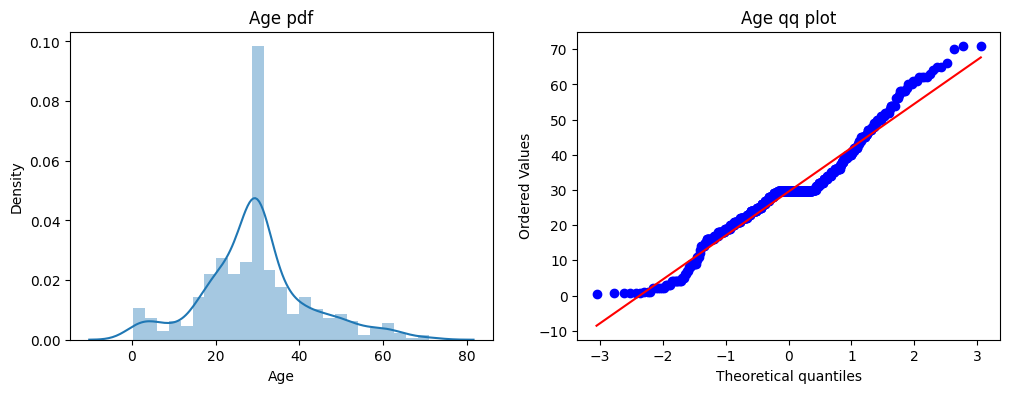

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age qq plot')

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12132\2636853441.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


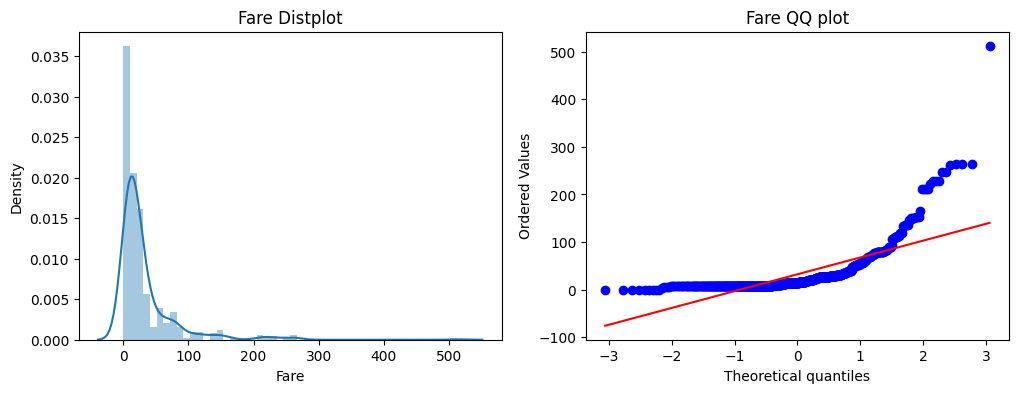

In [57]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Fare Distplot")

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare QQ plot")

plt.show()

In [58]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [59]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [61]:
print("Logistic ", accuracy_score(y_test,y_pred))
print("Decision Tree", accuracy_score(y_test,y_pred1))

Logistic  0.6567164179104478
Decision Tree 0.6343283582089553


### Applying Function Transformation

- np.log use kiya aur data mein 0 nikla then thats a problem
- whereas np.log1p (+1)karega to zero or any other no.

In [62]:
trf = FunctionTransformer(func=np.log1p)

In [63]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [64]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

clf3.fit(X_train_transformed,y_train)
clf4.fit(X_train_transformed,y_train)

y_pred2 = clf3.predict(X_test_transformed)
y_pred3 = clf4.predict(X_test_transformed)

print("Logistic ", accuracy_score(y_test,y_pred2))
print("Decision Tree", accuracy_score(y_test,y_pred3))


Logistic  0.6828358208955224
Decision Tree 0.6492537313432836


In [65]:
## To cross verify- cross validation

X_transformed = trf.fit_transform(X)

lr = LogisticRegression()
cf = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(cf,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588514357053683


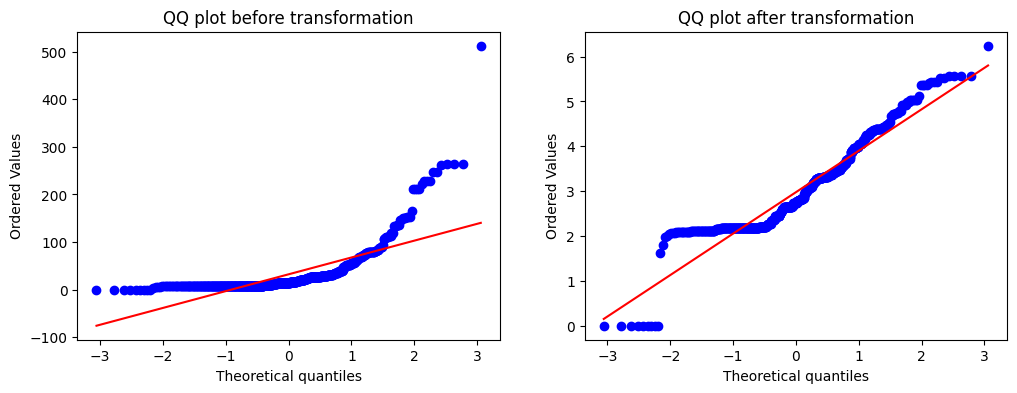

In [68]:
## QQ plot  --Fare
plt.figure(figsize=(12,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("QQ plot before transformation")


plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title("QQ plot after transformation")

plt.show()

Text(0.5, 1.0, 'QQ plot after transformation')

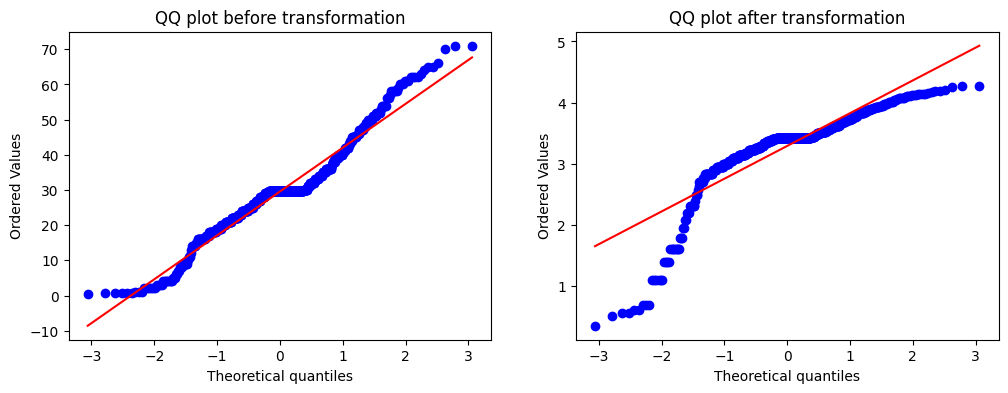

In [69]:
## QQ plot  --Age
plt.figure(figsize=(12,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("QQ plot before transformation")


plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title("QQ plot after transformation")


In [70]:
trf3 = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [72]:
X_train_transformed2 = trf3.fit_transform(X_train)
X_test_transformed2 = trf3.transform(X_test)

In [73]:
clf5 = LogisticRegression()
clf6 = DecisionTreeClassifier()

clf5.fit(X_train_transformed2,y_train)
clf6.fit(X_train_transformed2,y_train)

y_pred4 = clf5.predict(X_test_transformed2)
y_pred5 = clf6.predict(X_test_transformed2)

print("Logistic ", accuracy_score(y_test,y_pred4))
print("Decision Tree", accuracy_score(y_test,y_pred5))


Logistic  0.6716417910447762
Decision Tree 0.6343283582089553


In [74]:
## To cross verify- cross validation

X_transformed2 = trf.fit_transform(X)

lr1 = LogisticRegression()
cf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(lr1,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(cf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6644444444444444


In [106]:
def apply_transform(transform):
    X= df.iloc[:,1:3]
    y= df.iloc[:,0]
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy_score", np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    stats.probplot(X_train['Fare'],dist='norm',plot=plt)
    plt.title("QQ plot before transformation")
    
    
    plt.subplot(122)
    stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
    plt.title("QQ plot after transformation")

    plt.show()



Accuracy_score 0.6431335830212235


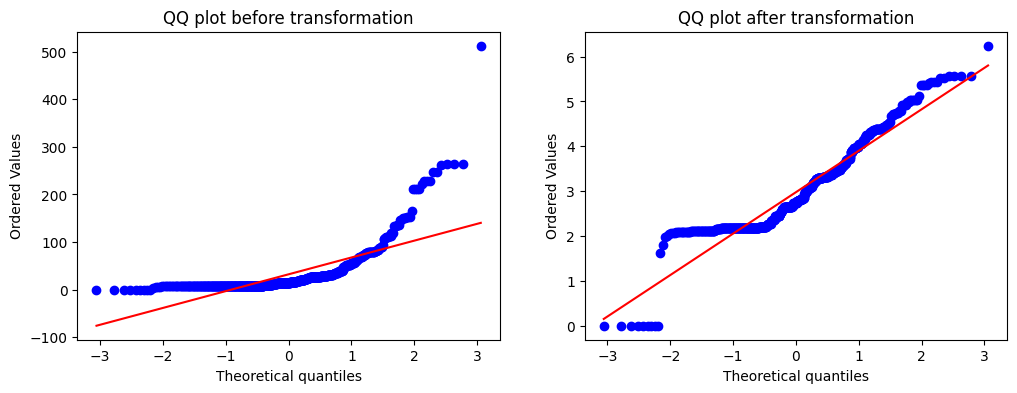

In [107]:
apply_transform(lambda x:x*x)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Set up ColumnTransformer and apply it only on the training data
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    X_train_trans = trf.fit_transform(X_train)
    X_test_trans = trf.transform(X_test)  # Apply the transformation learned from training to the test set
    
    # Train logistic regression on the transformed training data and evaluate on transformed test data
    clf = LogisticRegression()
    print("Training Accuracy Score:", np.mean(cross_val_score(clf, X_train_trans, y_train, scoring='accuracy', cv=10)))
    
    # Plot the effect of transformation on the training data
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    stats.probplot(X_train['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform (Training)')

    plt.subplot(122)
    stats.probplot(X_train_trans[:, 0], dist="norm", plot=plt)
    plt.title('Fare After Transform (Training)')
    plt.show()


Training Accuracy Score: 0.6488654147104851


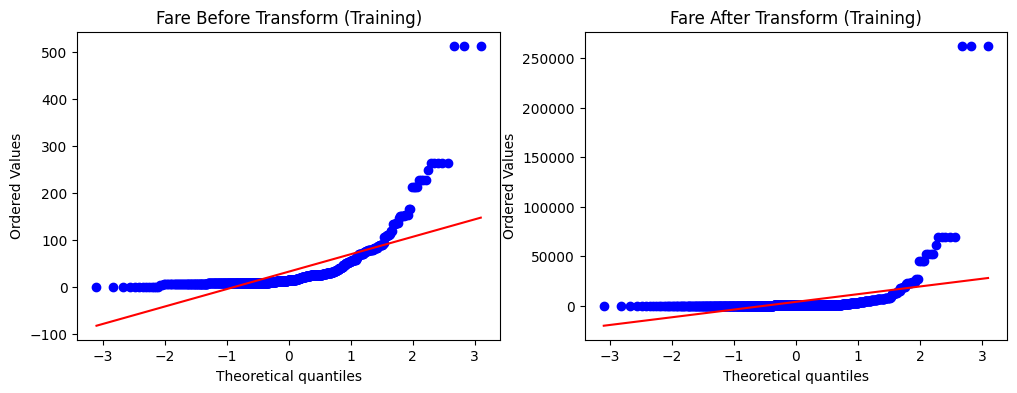

In [109]:
apply_transform(lambda x:x*x)

In [113]:
df1 = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\cars.csv")

In [139]:
def apply_transform(transform):
    X= df1.iloc[:,1]
    y= df1.iloc[:,4]
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['km_driven'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LinearRegression()

    print("Accuracy_score", np.mean(cross_val_score(clf,X_trans,y,scoring='r2',cv=10)))
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    stats.probplot(X_train['km_driven'],dist='norm',plot=plt)
    plt.title("QQ plot before transformation")
    
    
    plt.subplot(122)
    stats.probplot(X_train_transformed[:,1],dist='norm',plot=plt)
    plt.title("QQ plot after transformation")

    plt.show()

In [140]:
apply_transform(np.sin)

IndexError: tuple index out of range

In [124]:
df1.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [130]:
from sklearn.linear_model import LinearRegression